# **Heart Disease Identification with Decision Trees**

The code below is taken from Pablo M Gomez's submission on [kaggle.com](https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model).

You are encouraged to go to the link above and check the full code. In this lab, you will do the necessary steps to explore the data and prepare it for sklearn algorithms.

**About the data set**

The Cleveland database is the only one that has been used by ML researchers to
this date to predict the presence of heart disease in a patient. It is integer valued from 0 (no presence) to 4.


**Import libraries**

In [1]:
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.tree import DecisionTreeClassifier

# Acquire data

In [2]:
# Read in the data using panda's read_csv method
dt = pd.read_csv("SupervisedLearning/HeartDiseaseIdentification/heart.csv")

#TODO: Write code to inspect the first five rows of the dataframe
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Inspect data

In [3]:
#TODO: Write code to inspect the shape of the data frame
dt.shape

(303, 14)

In [4]:
#TODO: Write code to display information about the data frame
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#TODO: Write code to display statistics about the data frame
dt.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Clean data

**Correcting**

Let's change the column names to be a bit clearer

In [6]:
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

**Converting**

Let's change the values of the categorical variables, to improve the interpretation later on

In [7]:
# Convert features 'female' and 'male' to 0 and 1
dt['sex'][dt['sex'] == 0] = 'female'
dt['sex'][dt['sex'] == 1] = 'male'

# Convert chest_pain_type features to 0,1,2,3 and 4
dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'

#TODO: Write code to convert fasting_blood_sugar features
#Hint: 'lower than 120mg/ml' should be 0, and 
#'greater than 120mg/ml' should be 1
dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 0 ] = 'lower than 120mg/ml'
dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 1 ] = 'greater than 120mg/ml'

#TODO: Write code to convert rest_ecg features
#Hint: 'normal' should be 0, and 
#'ST-T wave abnormality' should be 1
#'left ventricular hypertrophy' should be 2
dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'

#TODO: Write code to convert exercise_induced_angina features
#Hint: 'no' should be 0, and 
#'yes' should be 1
dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 0] = 'No'
dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 1] = 'Yes'

#TODO: Write code to convert st_slope features
#Hint: 'upsloping' should be 0, and 
#'flat' should be 1
#'downsloping' should be 2
dt['st_slope'][dt['st_slope'] == 0] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 1] = 'flat'
dt['st_slope'][dt['st_slope'] == 2] = 'downsloping'

#TODO: Write code to convert thalassemia features
#Hint: 'normal' should be 0, and 
#'fixed defect' should be 1
#'reversable defect' should be 2
dt['thalassemia'][dt['thalassemia'] == 0] = 'normal'
dt['thalassemia'][dt['thalassemia'] == 1] = 'fixed defect'
dt['thalassemia'][dt['thalassemia'] == 2] = 'reversable defect'
 

/tmp/ipykernel_319/325040671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['sex'][dt['sex'] == 0] = 'female'
/tmp/ipykernel_319/325040671.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
/tmp/ipykernel_319/325040671.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 0 ] = 'lower than 120mg/ml'
/tmp/i

Check the data types

In [8]:
dt.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

Some of those aren't quite right. The code below changes them into categorical variables

In [9]:
dt['sex'] = dt['sex'].astype('object')
dt['chest_pain_type'] = dt['chest_pain_type'].astype('object')
dt['fasting_blood_sugar'] = dt['fasting_blood_sugar'].astype('object')
dt['rest_ecg'] = dt['rest_ecg'].astype('object')
dt['exercise_induced_angina'] = dt['exercise_induced_angina'].astype('object')
dt['st_slope'] = dt['st_slope'].astype('object')
dt['thalassemia'] = dt['thalassemia'].astype('object')


In [10]:
#TODO: Write code to check the data types again see the change
dt.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

**Creating**

For the categorical varibles, we need to create dummy variables and drop the first category of each. 

For example, rather than having 'male' and 'female', we'll have 'male' with values of 0 or 1 (1 being male, and 0 therefore being female).

In [11]:
dt = pd.get_dummies(dt, drop_first = True)

Inspect the data frame

In [12]:
dt.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_Yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0
1,37,130,250,187,3.5,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1
2,41,130,204,172,1.4,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1
3,56,120,236,178,0.8,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1
4,57,120,354,163,0.6,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1


# Earn Your Wings

Use a decision tree classifier on the cleaned data set to predict 'Survived' for the given data. Report the accuracy score. Add comments in your code to explain each step that you take in your implementation.

<b>#I figured this was a mistake because this same cell is used in the Titanic_Survivors file. Hence Im going with RandomForestClassifier that predicts if a person has heart disease or not for this per the tutorial</b>

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [14]:
#Split the data to a training set
X_train, X_test, y_train, y_test = train_test_split(dt.drop('target', 1), dt['target'], test_size = .2, random_state = 10)

/tmp/ipykernel_319/3610960497.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(dt.drop('target', 1), dt['target'], test_size = .2, random_state = 10)


In [15]:
#make the model and fit the data.
model = RandomForestClassifier(max_depth = 5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [16]:
#Plot the decision tree
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [17]:
tree.export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

In [18]:
#evaluate the model
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:,1]
y_pred_bin = model.predict(X_test)

In [19]:
#View accuracy score
accuracy_score (y_test, y_predict)

0.8032786885245902

In [20]:
#We can assess the fit with a confusion matrix.
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[27,  8],
       [ 4, 22]])

In [21]:
#Diagnostic test with Precision/Sensitivity and Recall/Specificity
total = sum(sum(confusion_matrix))

precision = confusion_matrix[0,0]/(confusion_matrix[0,0] + confusion_matrix[1,0])
print('Precision / Sensitivity: ', precision)

recall = confusion_matrix[1,1]/(confusion_matrix[1,1] + confusion_matrix[0,1])
print('Recall / Specificity : ', recall)

Precision / Sensitivity:  0.8709677419354839
Recall / Specificity :  0.7333333333333333


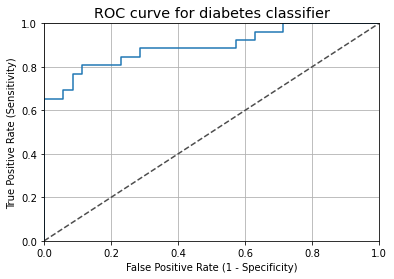

In [22]:
#Plot ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant) 

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [23]:
#Area Under Curve AUC
auc(fpr, tpr)

0.8934065934065935